In [1]:
from kandinsky import get_T2V_pipeline
from IPython.display import Video
from PIL import Image

/home/jovyan/.mlspace/envs/vladimir-cu12.6-torch2.6.0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pipe = get_T2V_pipeline(
    device_map={"dit": "cuda:0", "vae": "cuda:1", "text_embedder": "cuda:2"},
)

Returning existing local_dir `weights` as remote repo cannot be accessed in `snapshot_download` (404 Client Error. (Request ID: Root=1-68cbe3f2-1421654021ad6ffd3b35f289;0b3a7192-6b98-4692-a4aa-d7afed3f9dbe)

Repository Not Found for url: https://huggingface.co/api/models/ai-forever/kandinsky-5/revision/main.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated.).

Repository Not Found for url: https://huggingface.co/api/models/ai-forever/kandinsky-5/revision/main.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated.).
Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00,  5.12it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow pro

# Video

In [3]:
out = pipe(["a cat in a red hat", "a cat in a blue hat"], time_length=2, width=768, height=512, save_path=['./test.mp4', './test1.mp4'])
out.shape

100%|██████████| 50/50 [02:10<00:00,  2.60s/it]


torch.Size([2, 3, 49, 512, 768])

In [4]:
Video('./test.mp4')

In [5]:
Video('./test1.mp4')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Images

In [6]:
out = pipe(
    ["a dog in a red boots", "a dog in a blue boots", "a dog in a green boots"], 
    time_length=0, width=768, height=512, 
    save_path=['./image.png', './image1.png', './image2.png']
)
[x.size for x in out]

100%|██████████| 50/50 [00:11<00:00,  4.48it/s]


[(768, 512), (768, 512), (768, 512)]

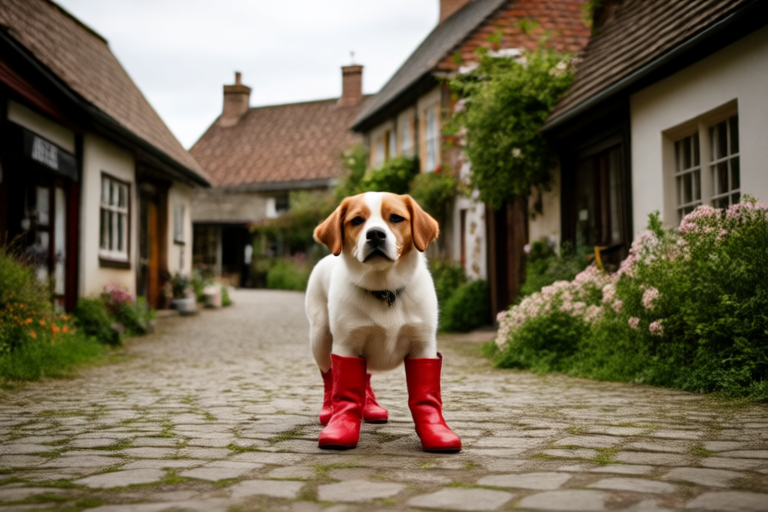

In [7]:
image = Image.open("./image.png")
image

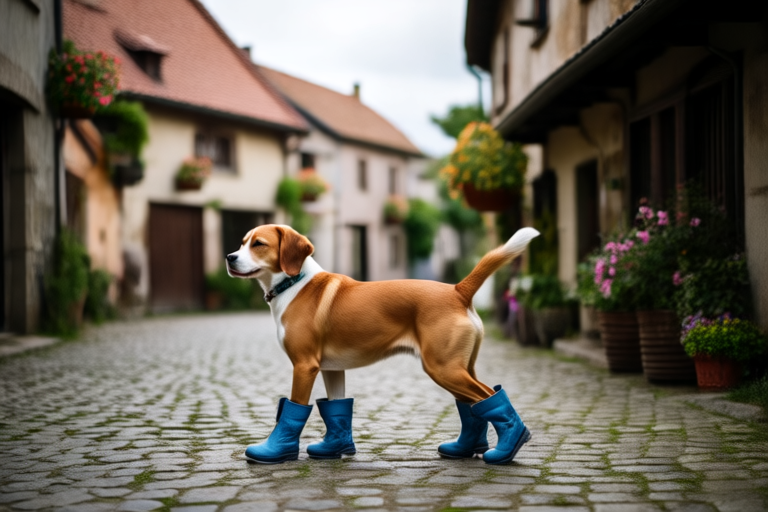

In [8]:
image = Image.open("./image1.png")
image

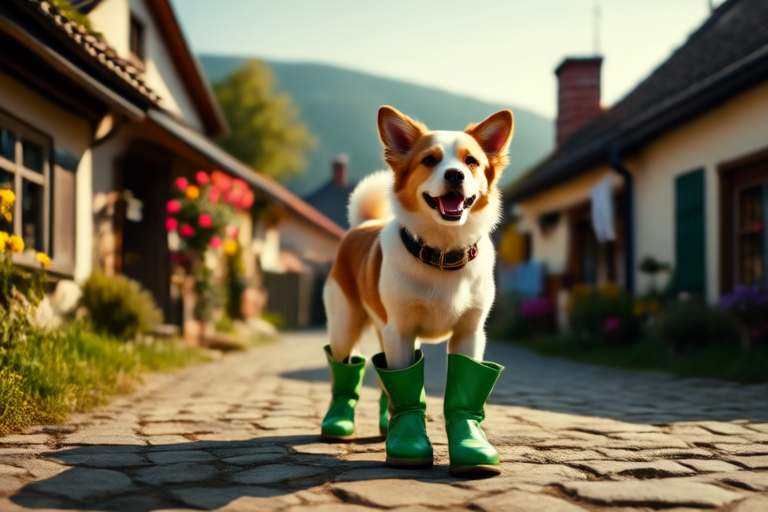

In [9]:
image = Image.open("./image2.png")
image

# Distilled model

In [10]:
pipe = get_T2V_pipeline(
    device_map={"dit": "cuda:0", "vae": "cuda:1", "text_embedder": "cuda:2"},
    conf_path="./configs/config_5s_distil.yaml"
) 

Loading checkpoint shards: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]


In [11]:
out = pipe("cheburashka in a blue hat", time_length=5, width=768, height=512, guidance_weight=1.0, num_steps=16, scheduler_scale=5, save_path='./test2.mp4')
out.shape

100%|██████████| 16/16 [00:40<00:00,  2.52s/it]


torch.Size([1, 3, 121, 512, 768])

In [12]:
Video('./test2.mp4')

# 10s video NABLA

In [13]:
pipe = get_T2V_pipeline(
    device_map={"dit": "cuda:0", "vae": "cuda:1", "text_embedder": "cuda:2"},
    conf_path="./configs/config_10s_sft.yaml"
) 

Loading checkpoint shards: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


In [14]:
out = pipe("Shiba Inu is driving a car", time_length=10, width=768, height=512, save_path='./test3.mp4')
out.shape

100%|██████████| 50/50 [06:32<00:00,  7.86s/it]


torch.Size([1, 3, 241, 512, 768])

In [15]:
Video('./test3.mp4')